## Summary stats

~43.5 billion total observed tokens:

In [1]:
from hol.models import Count

print(Count.total_token_count())

43401065888


9547 unique tokens (out of a list the 10k most frequent tokens in large modern corpora):

In [2]:
tokens = Count.tokens()
print(len(tokens))

9547


Total volume from 1750-1920:

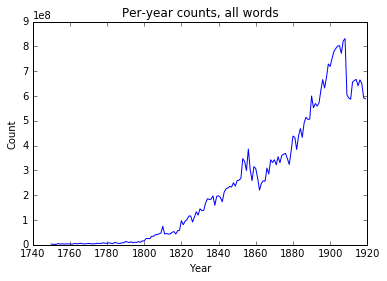

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

years = range(1750, 1920)

ts = Count.year_count_series(years)

plt.title('Per-year counts, all words')
plt.xlabel('Year')
plt.ylabel('Count')
plt.plot(*zip(*ts.items()))

Total counts for "literature" and "poetry":

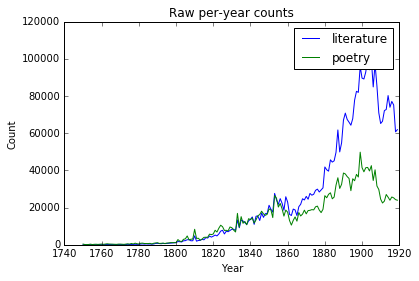

In [4]:
years = range(1750, 1920)

literature = Count.token_count_series('literature', years)
poetry = Count.token_count_series('poetry', years)

plt.title('Raw per-year counts')
plt.xlabel('Year')
plt.ylabel('Count')
plt.plot(*zip(*literature.items()), label='literature')
plt.plot(*zip(*poetry.items()), label='poetry')
plt.legend(loc='upper right')

Per-million counts for "literature" and "poetry":

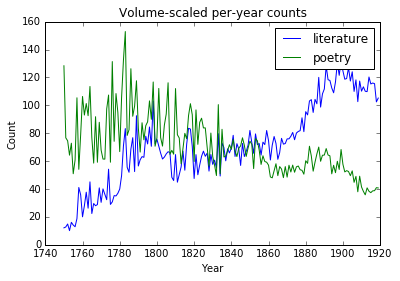

In [5]:
years = range(1750, 1920)

literature = Count.token_wpm_series('literature', years)
poetry = Count.token_wpm_series('poetry', years)

plt.title('Volume-scaled per-year counts')
plt.xlabel('Year')
plt.ylabel('Count')
plt.plot(*zip(*literature.items()), label='literature')
plt.plot(*zip(*poetry.items()), label='poetry')
plt.legend(loc='upper right')

Or, smoothed with a 10-year window:

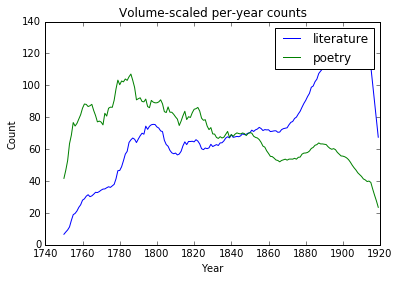

In [18]:
years = range(1750, 1920)

literature = Count.token_wpm_series_smooth('literature', years)
poetry = Count.token_wpm_series_smooth('poetry', years)

plt.title('Volume-scaled per-year counts')
plt.xlabel('Year')
plt.ylabel('Count')
plt.plot(*zip(*literature.items()), label='literature')
plt.plot(*zip(*poetry.items()), label='poetry')
plt.legend(loc='upper right')

## Log-likelihood time series

What words co-occur with literature at a higher-than-expected rate? For each token in each year, we can compute a log-likelihood score that represents the extent to which the token tends to appear alongside literature.

Eg, the scores for "god" (scaled to unit variance, since the raw scores are boosted by the overall volume, and aren't directly comparable from year to year):

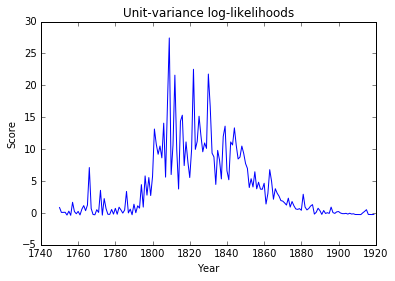

In [7]:
from hol.models import Score

years = range(1750, 1920)

poetry = Score.token_series('god', years)

plt.title('Unit-variance log-likelihoods')
plt.xlabel('Year')
plt.ylabel('Score')
plt.plot(*zip(*poetry.items()))

Smoothed with a 10-year window:

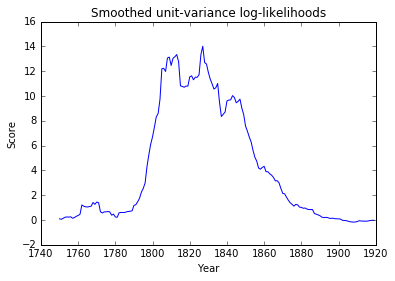

In [8]:
years = range(1750, 1920)

poetry = Score.token_series_smooth('god', years)

plt.title('Smoothed unit-variance log-likelihoods')
plt.xlabel('Year')
plt.ylabel('Score')
plt.plot(*zip(*poetry.items()))

Which words have the most variability, volatility, the most pronounced "trends" towards and away from literature? To take a simple approach - we can just step through all tokens, compute the log-likelihood time series, and then take the raw variance of the signal.

In [12]:
years = range(1750, 1920)

tsv = Score.ranked_series(years)

for token, (series, variance) in list(tsv.items())[:20]:
    print(token, variance)

history 65.6031433824
english 59.1352678638
book 58.3303487405
of 55.7010928629
books 40.7712701957
literary 38.5905314448
vols 33.0374380475
library 24.8801395259
edition 22.7326311625
works 22.0430278869
god 21.5035347413
i 21.3279116504
learning 19.1610184741
poetry 17.6182547175
cloth 16.3690325664
published 15.3261864935
professor 14.682505625
you 11.7778715704
court 11.3829498635
american 10.6920076139


To chew on it all - here are plots for the top 200 words, ranked by signal variance.

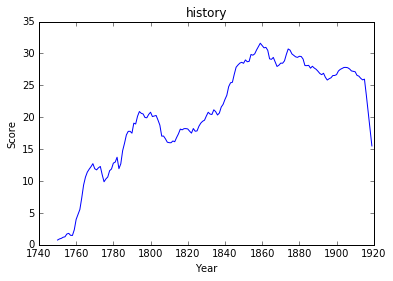

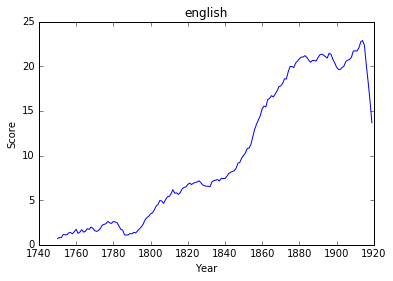

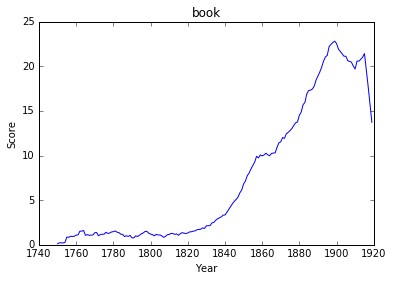

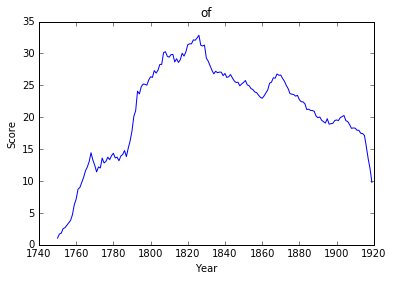

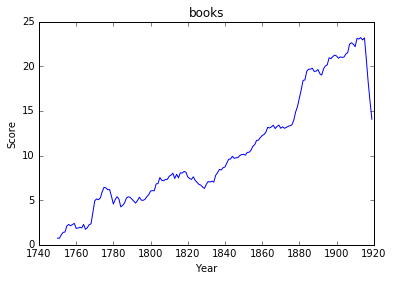

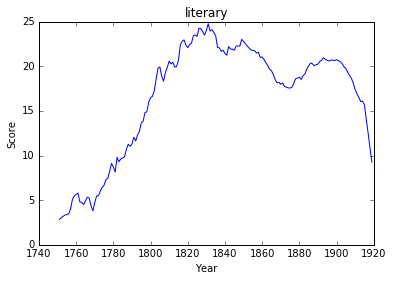

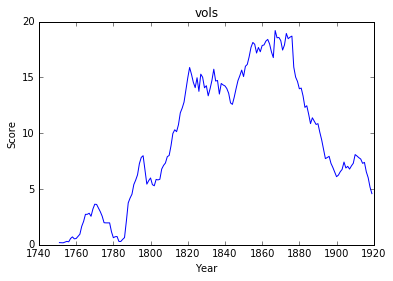

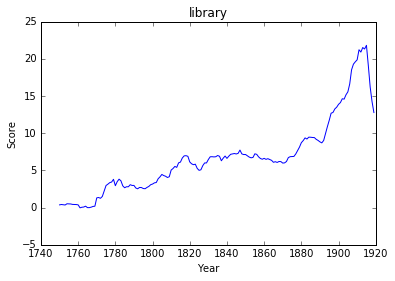

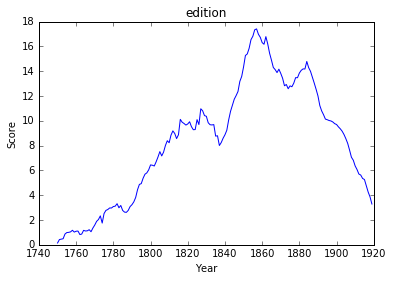

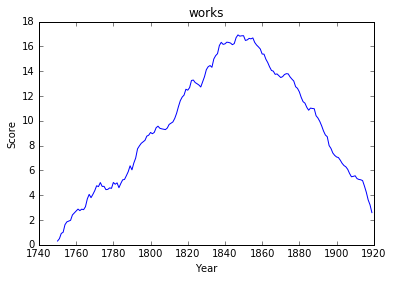

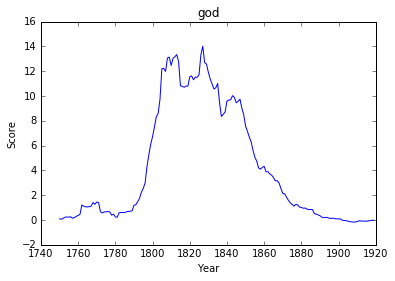

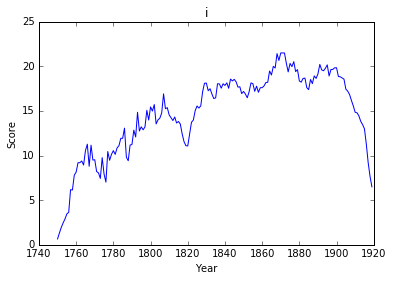

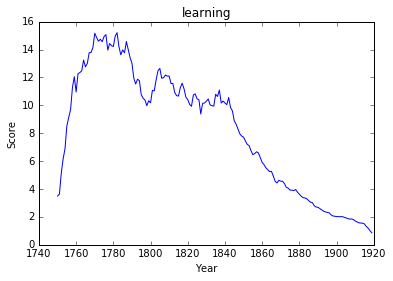

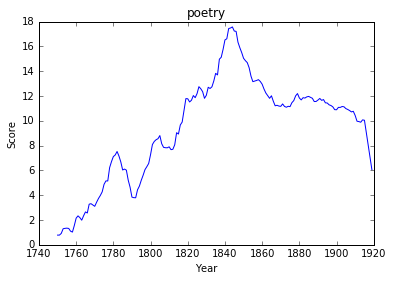

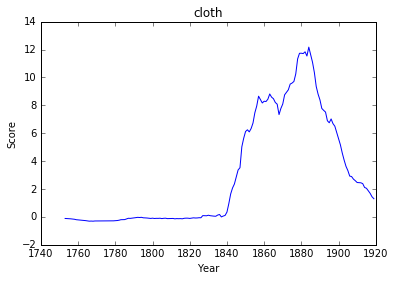

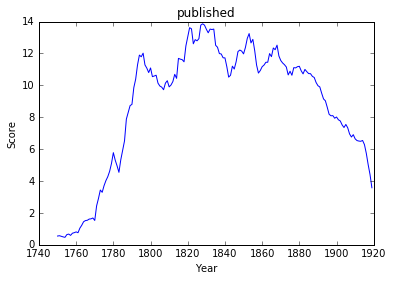

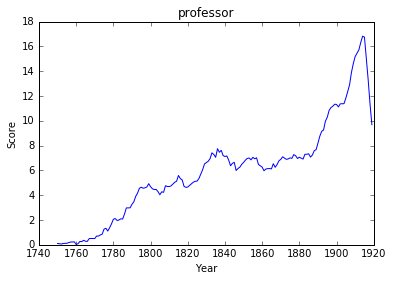

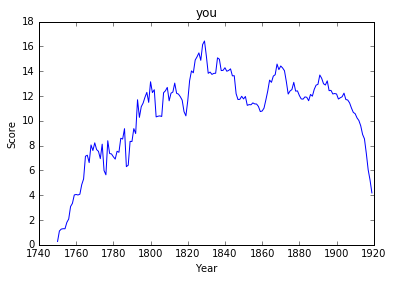

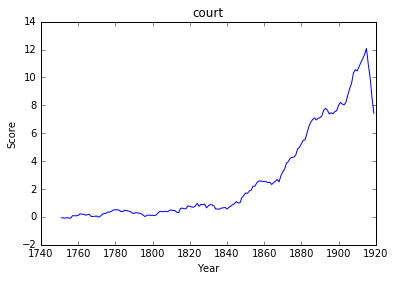

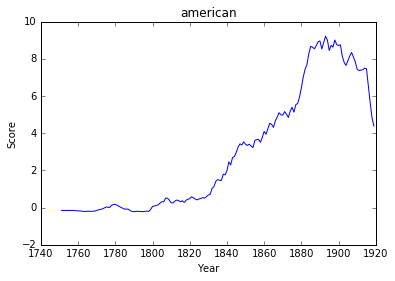

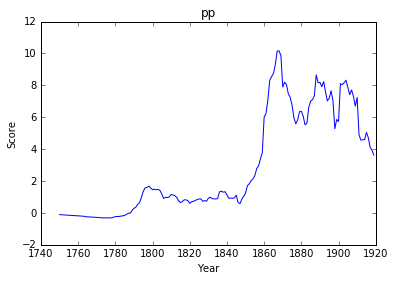

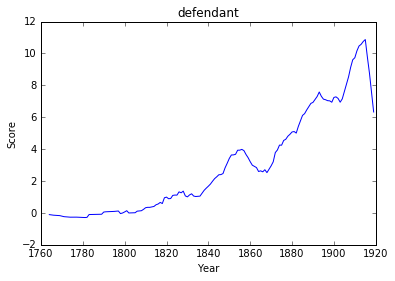

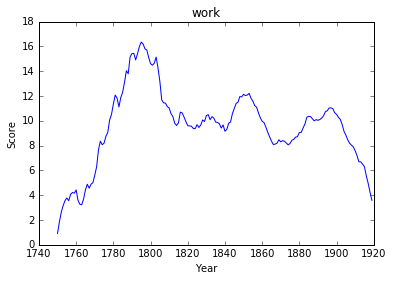

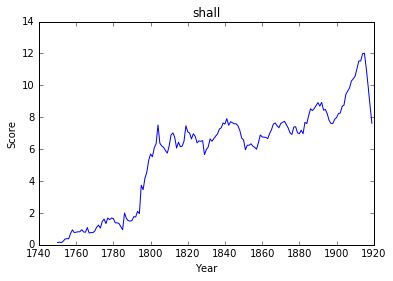

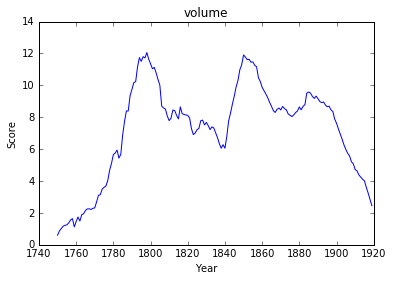

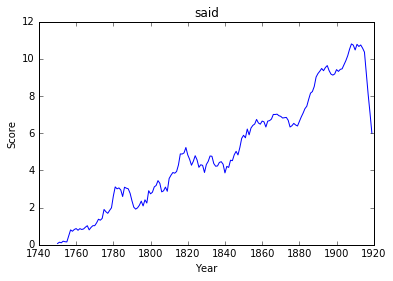

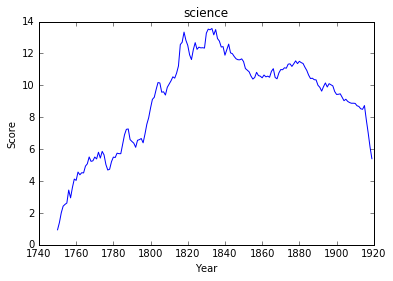

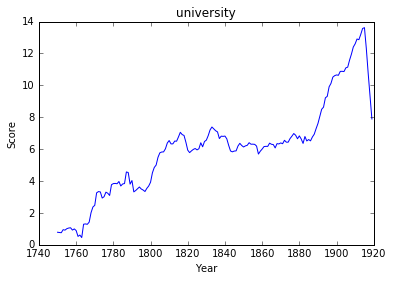

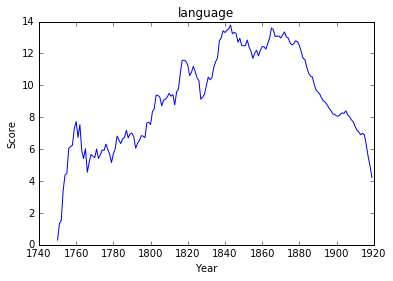

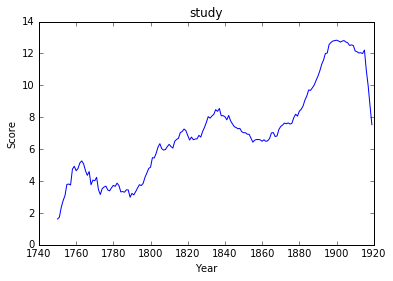

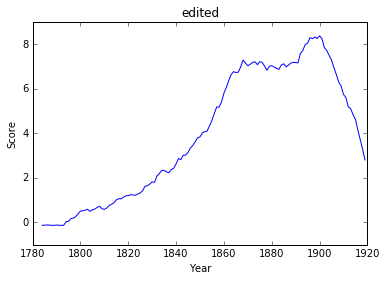

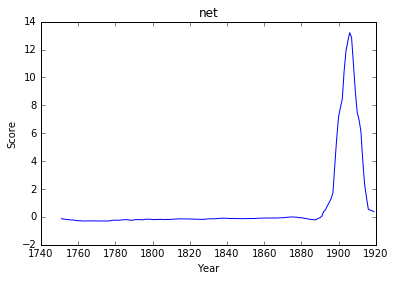

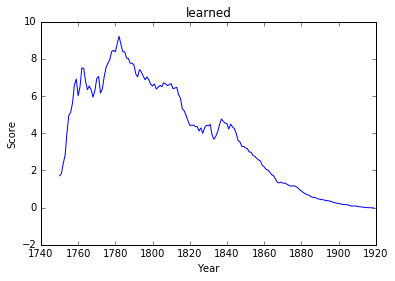

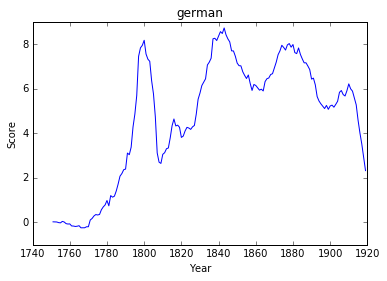

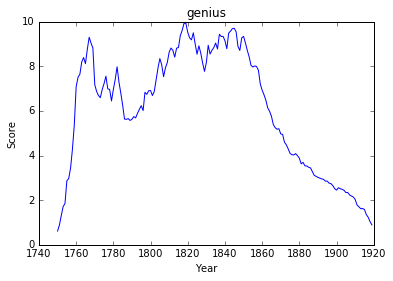

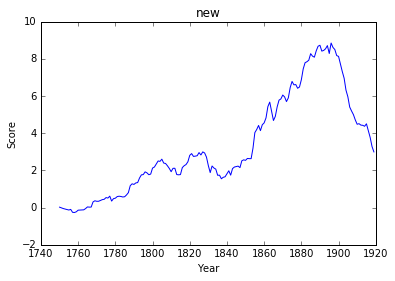

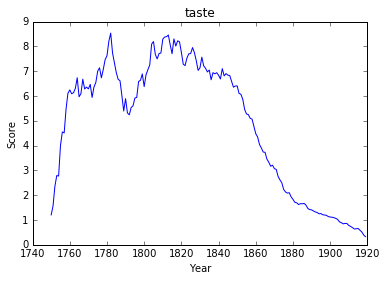

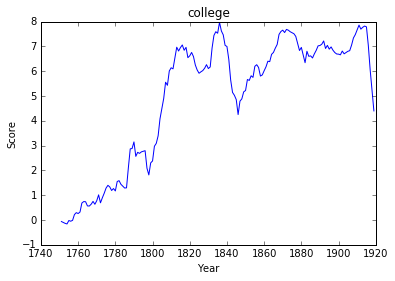

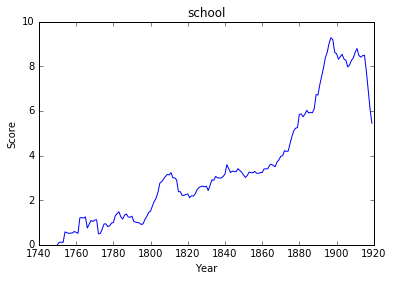

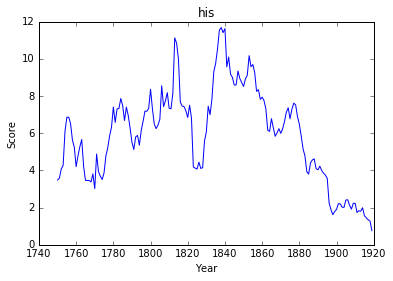

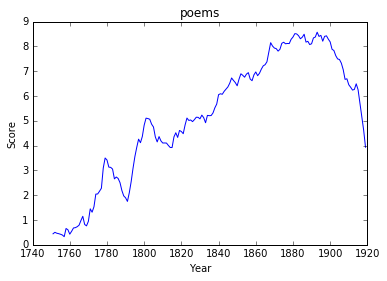

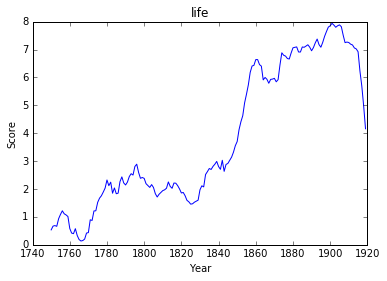

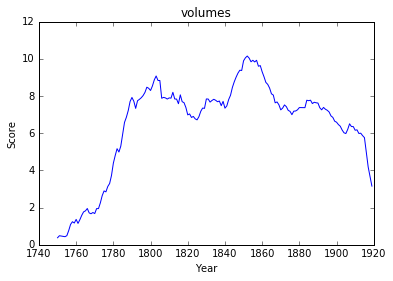

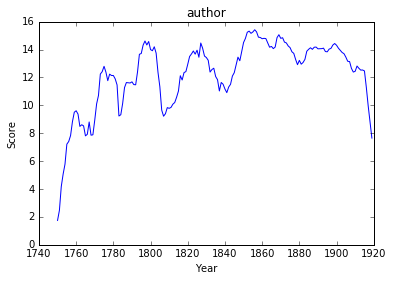

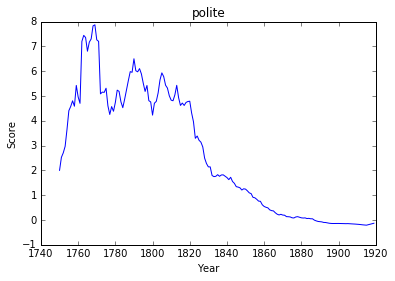

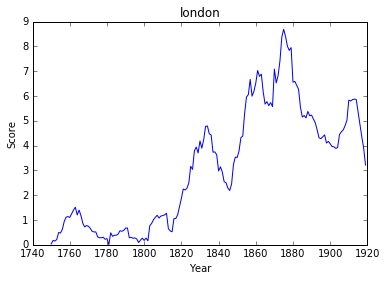

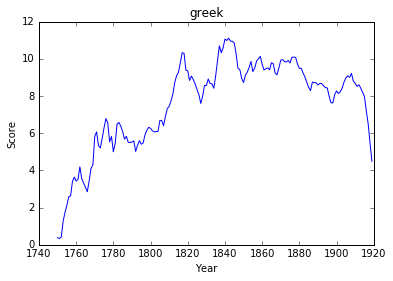

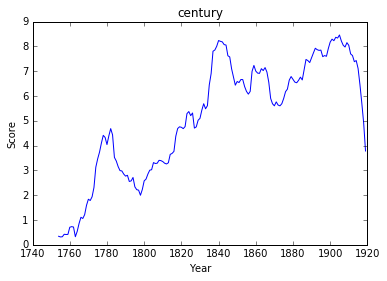

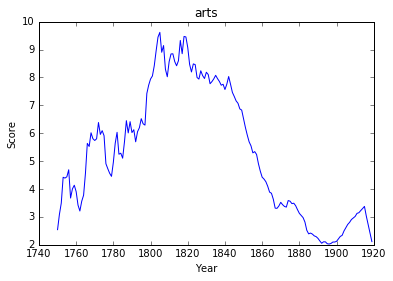

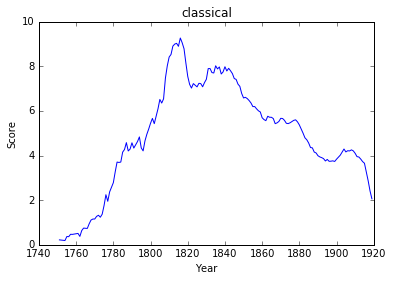

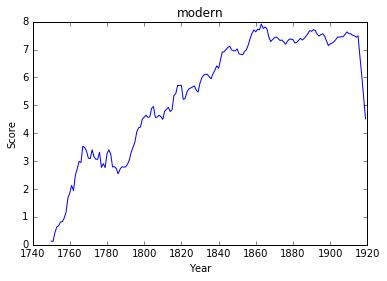

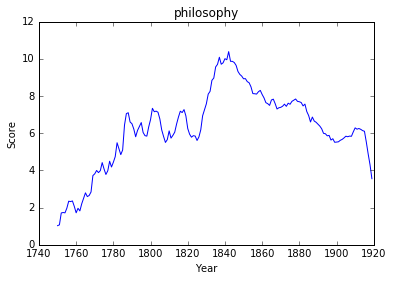

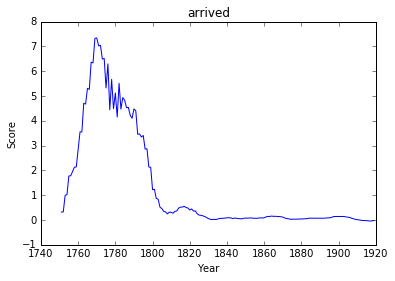

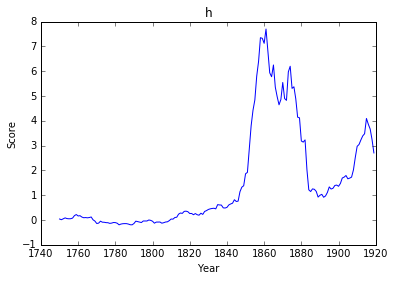

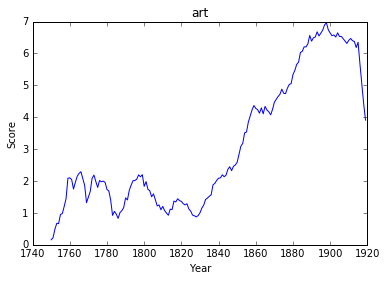

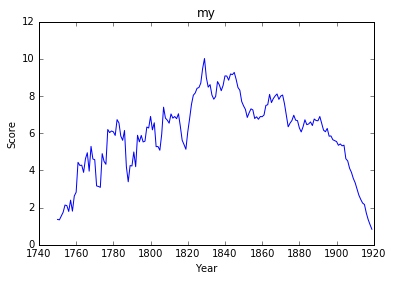

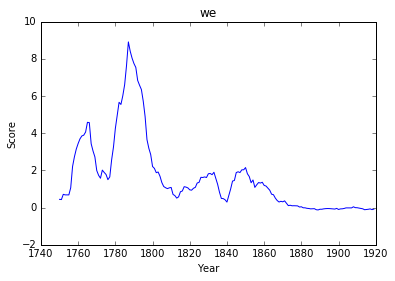

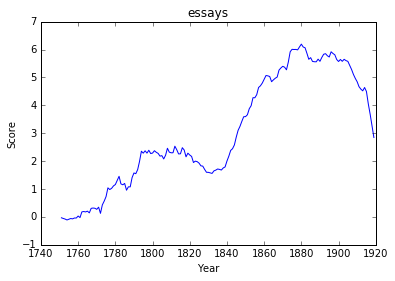

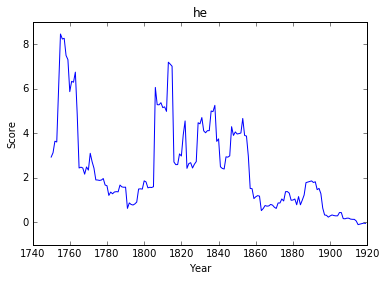

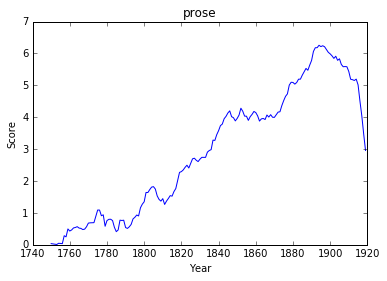

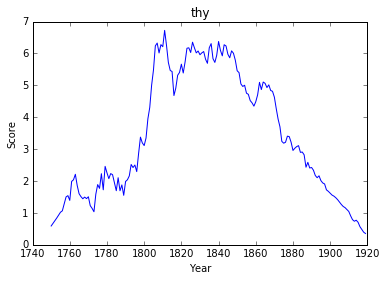

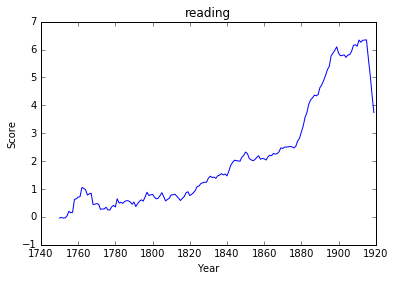

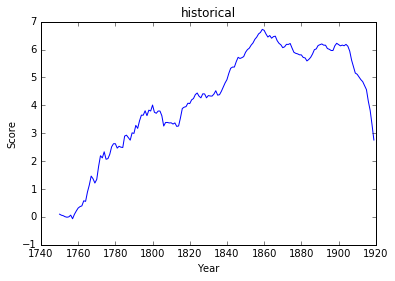

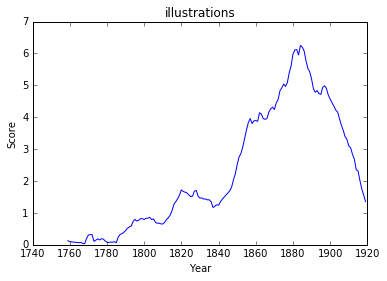

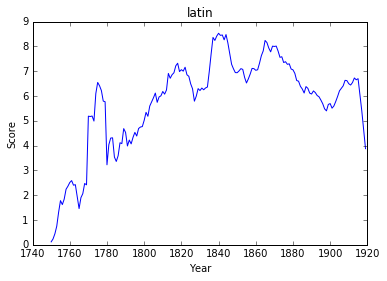

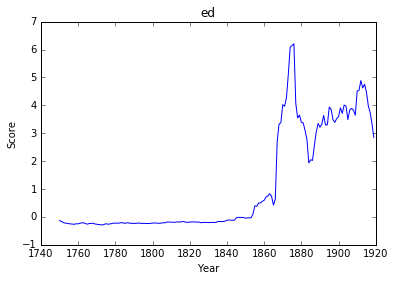

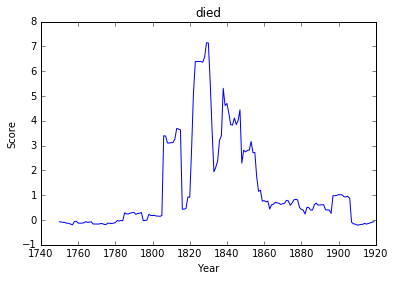

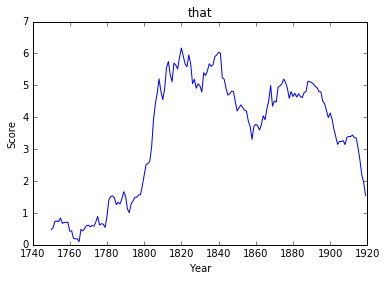

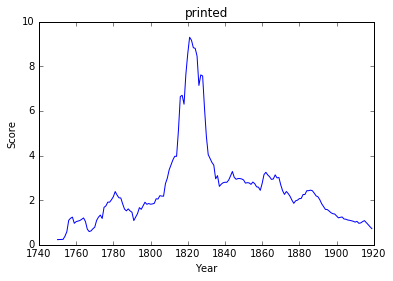

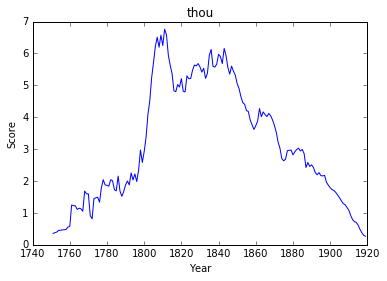

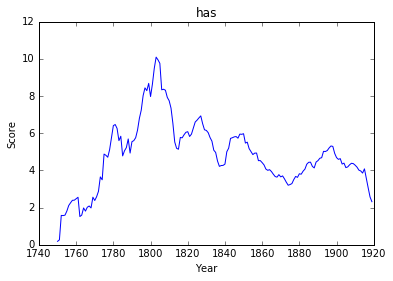

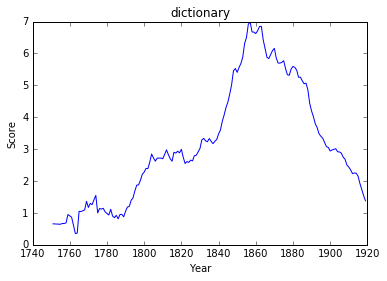

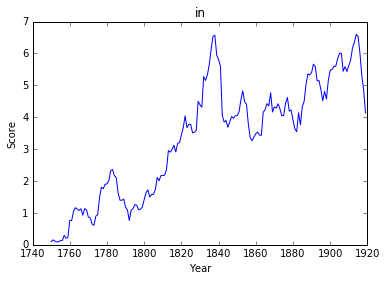

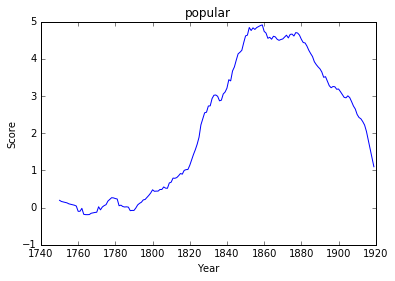

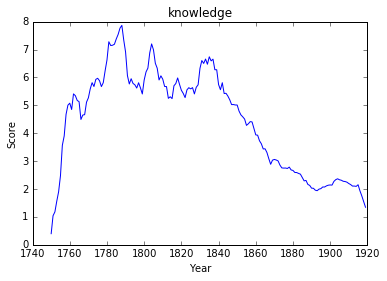

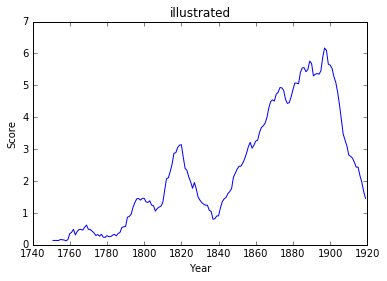

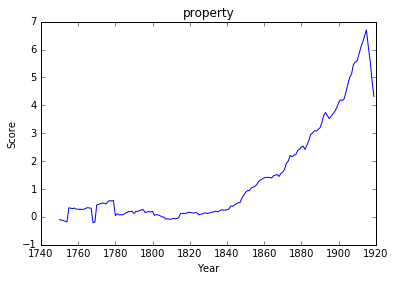

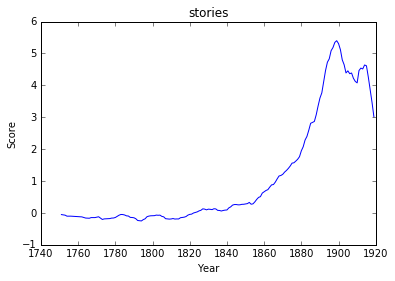

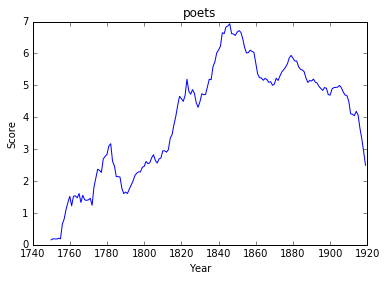

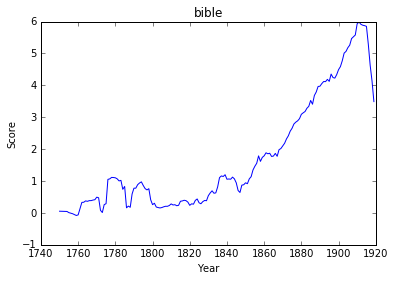

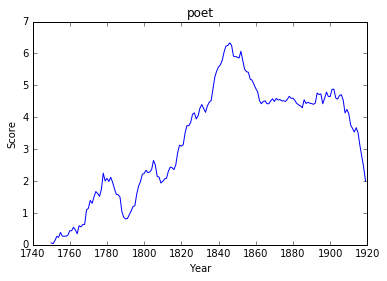

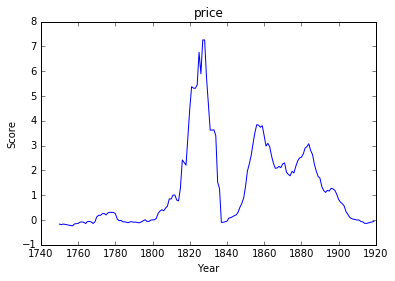

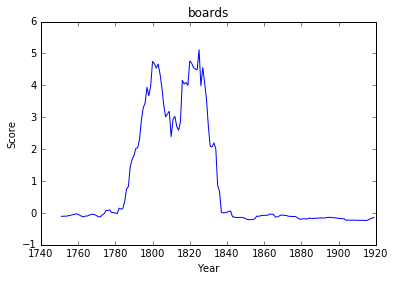

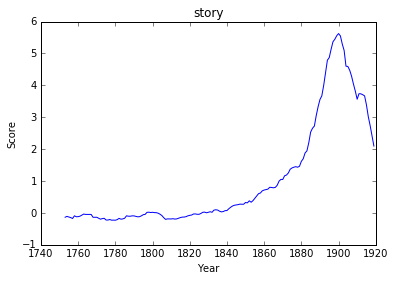

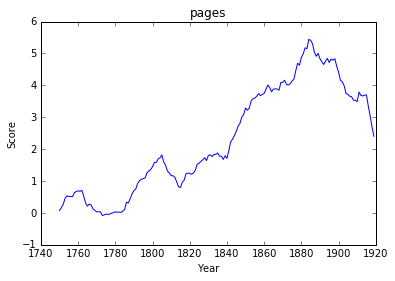

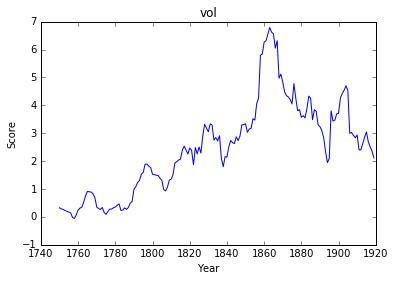

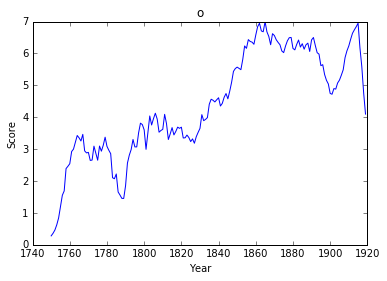

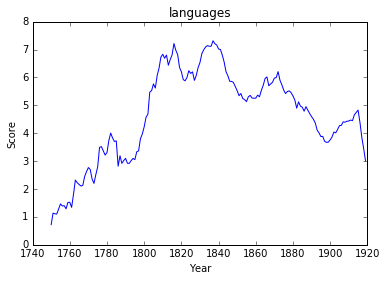

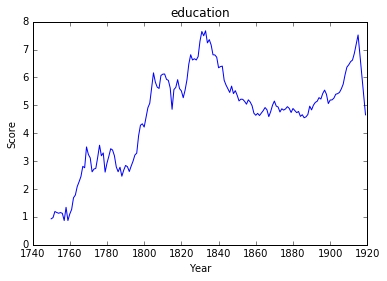

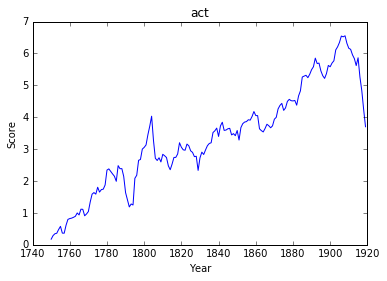

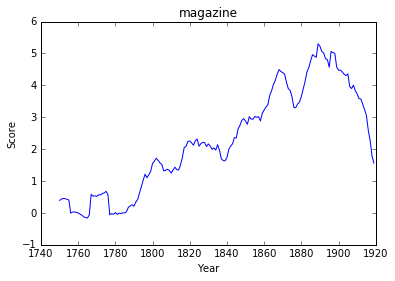

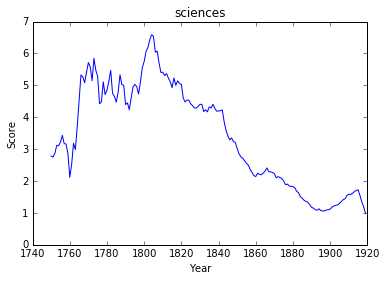

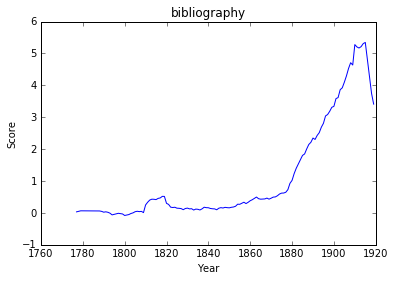

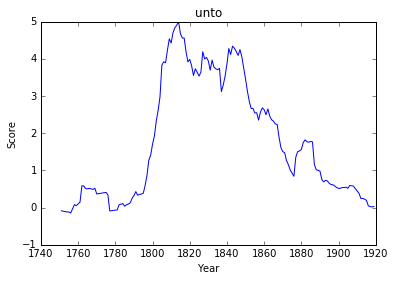

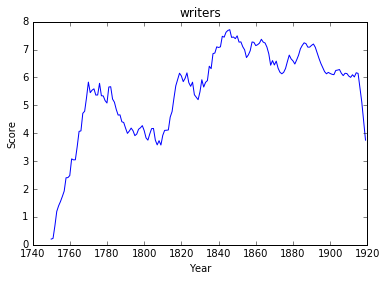

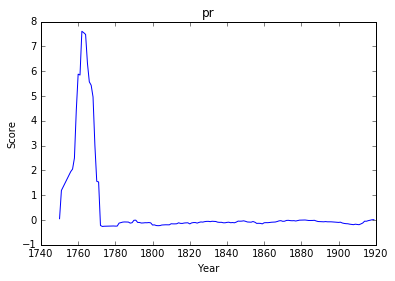

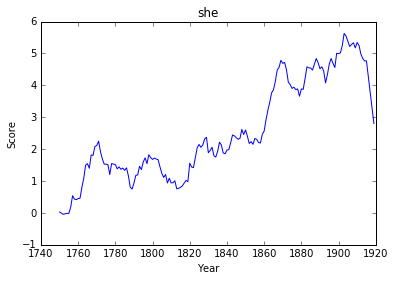

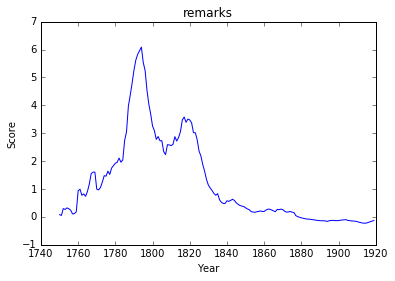

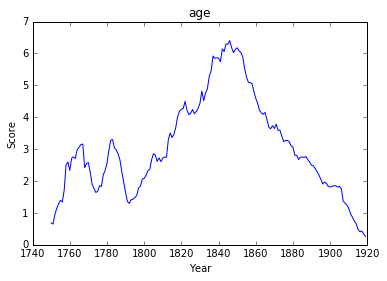

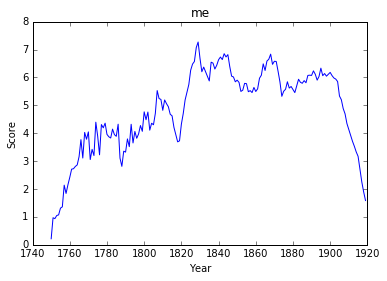

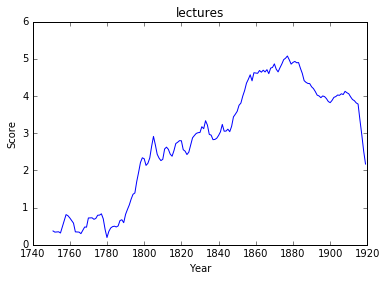

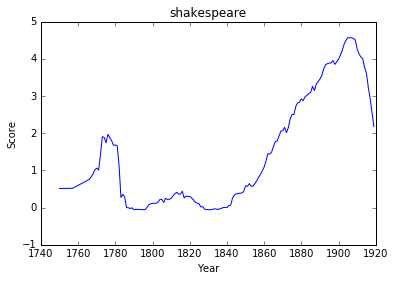

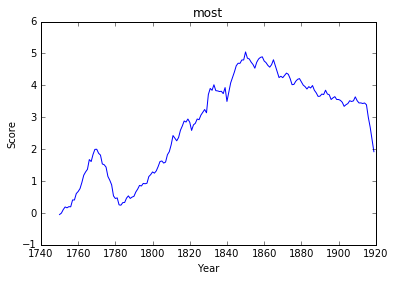

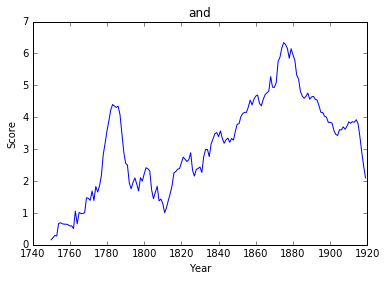

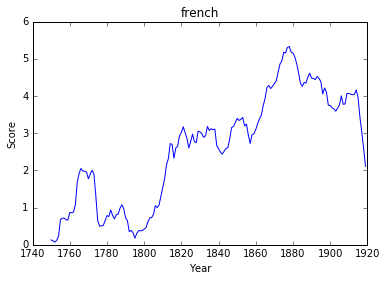

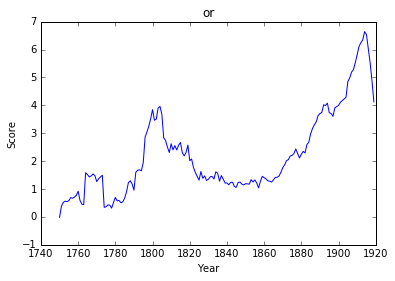

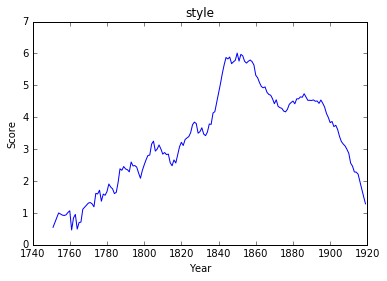

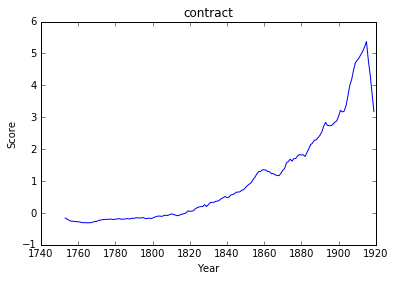

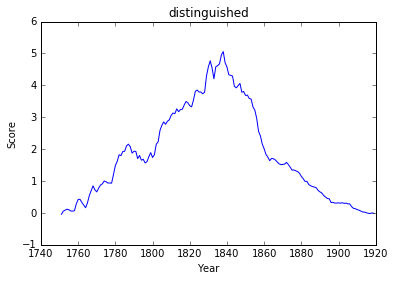

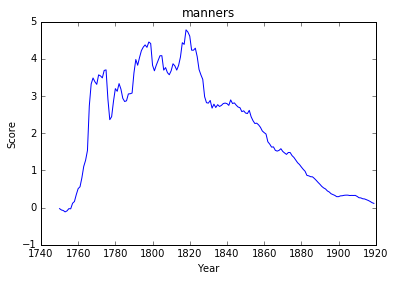

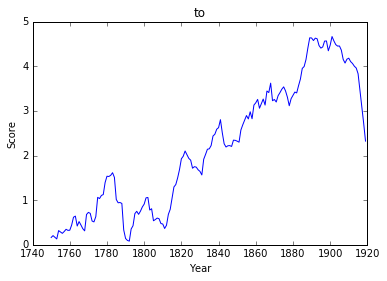

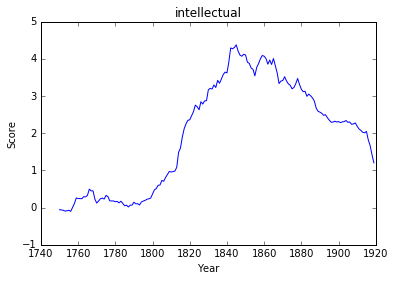

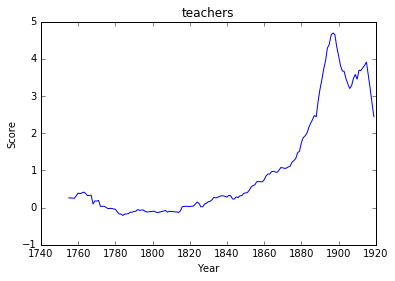

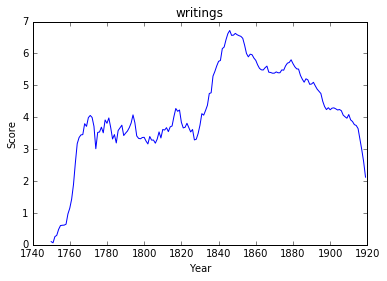

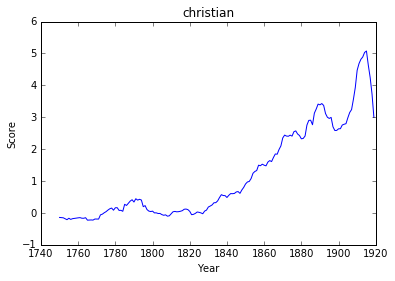

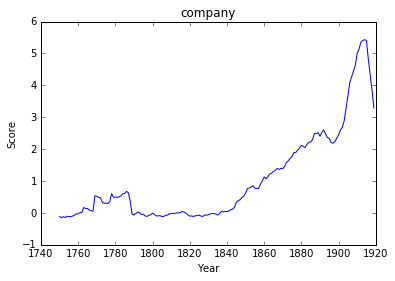

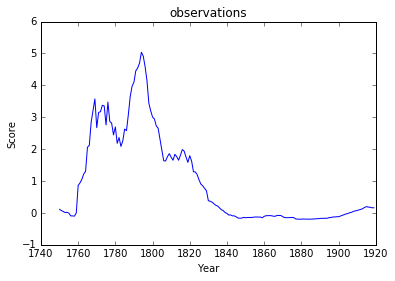

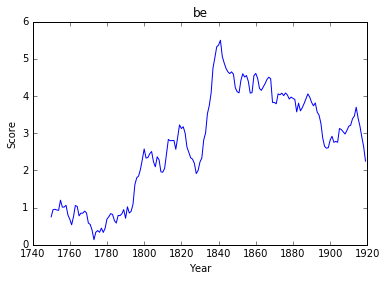

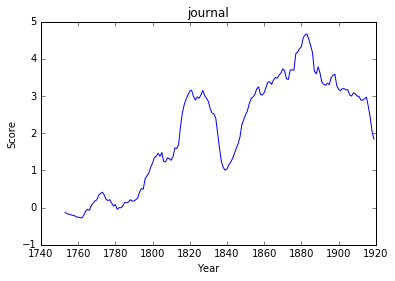

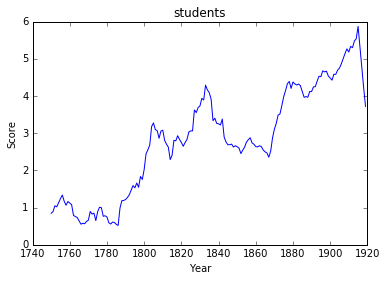

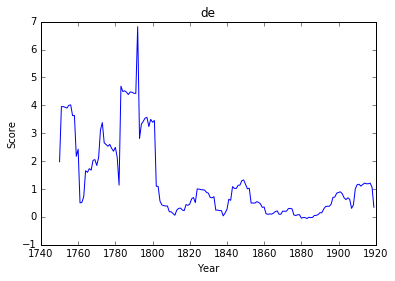

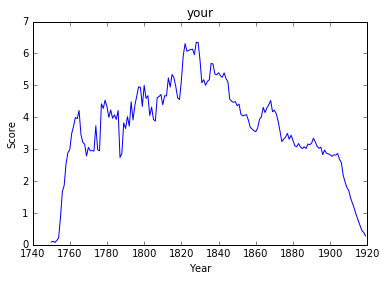

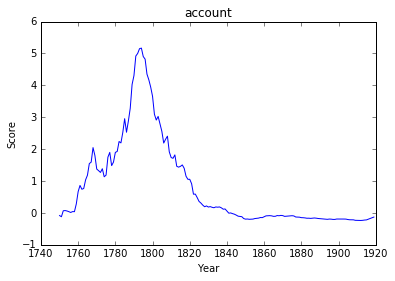

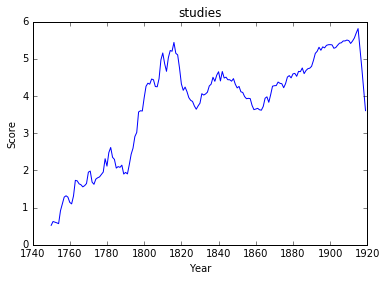

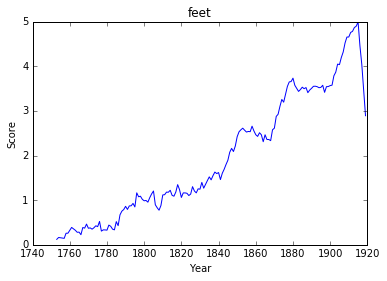

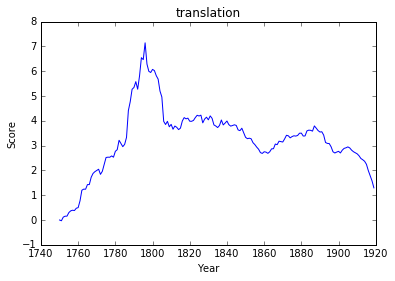

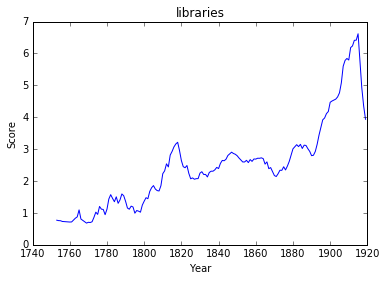

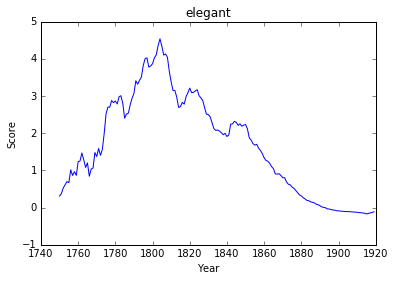

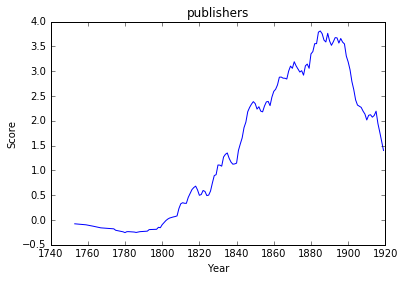

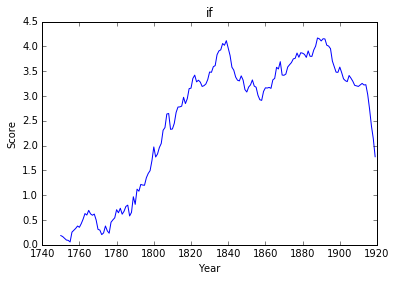

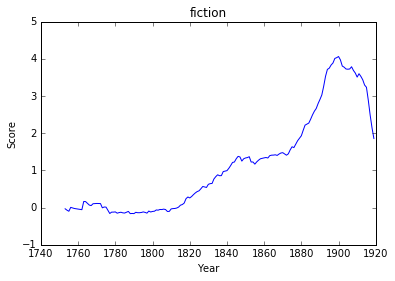

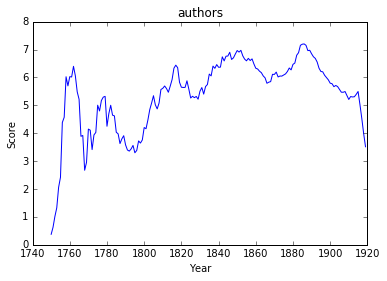

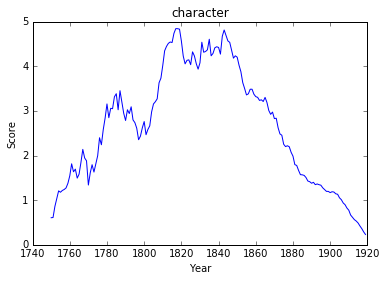

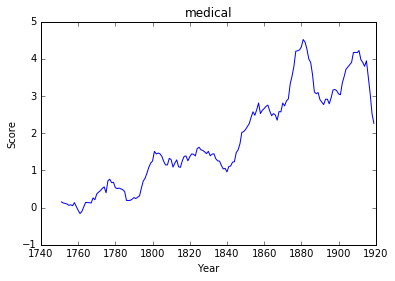

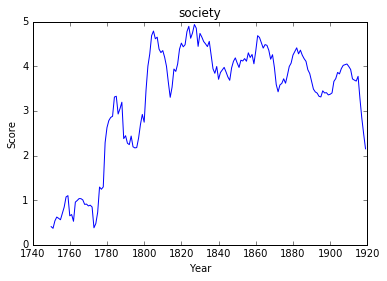

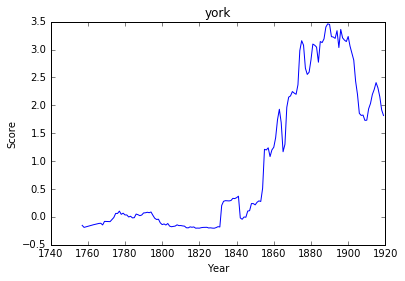

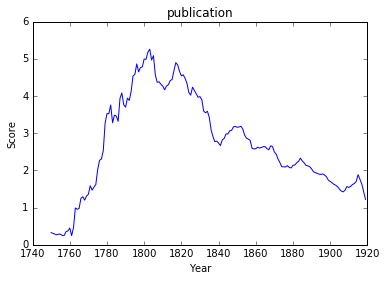

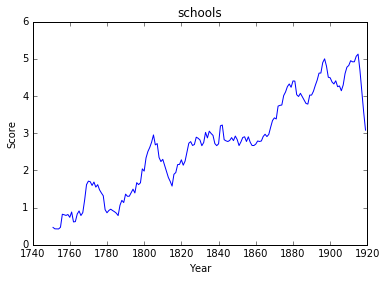

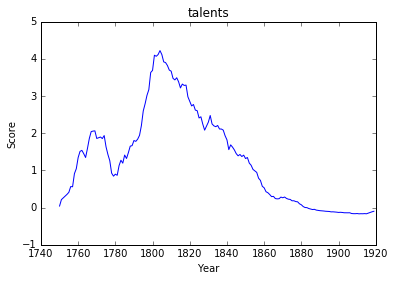

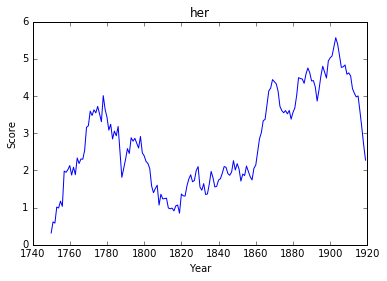

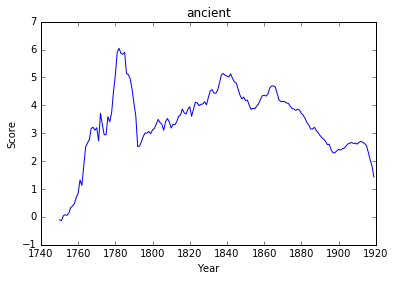

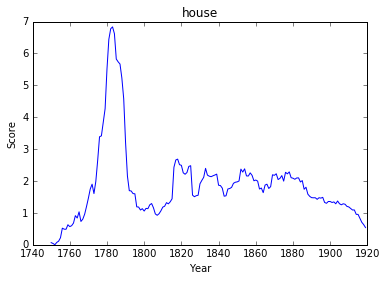

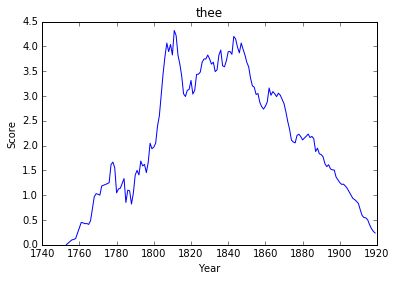

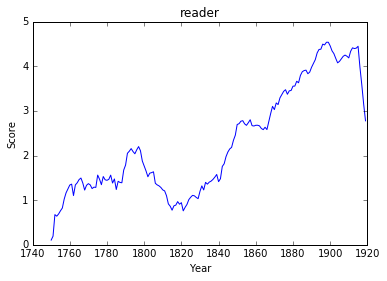

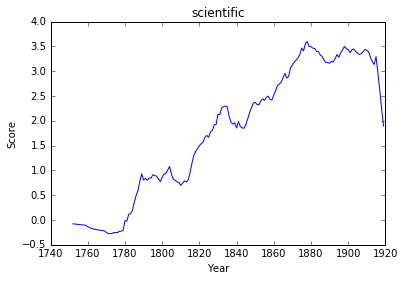

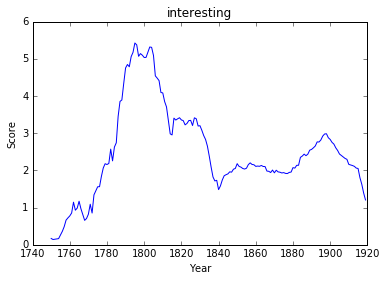

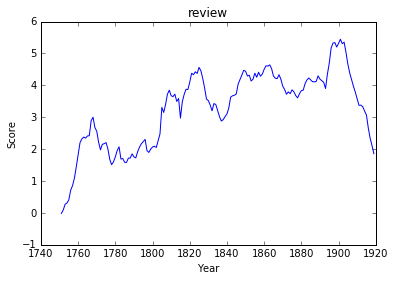

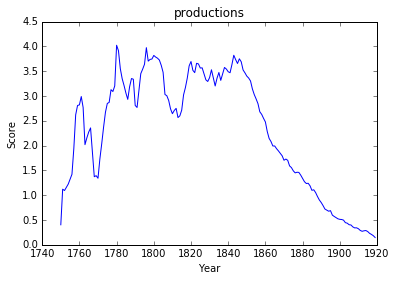

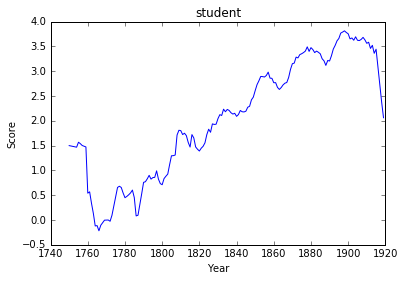

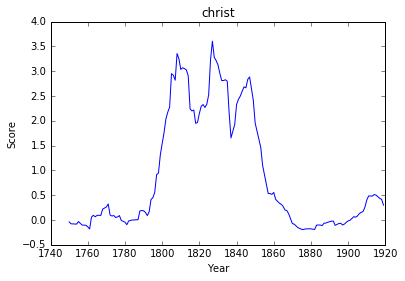

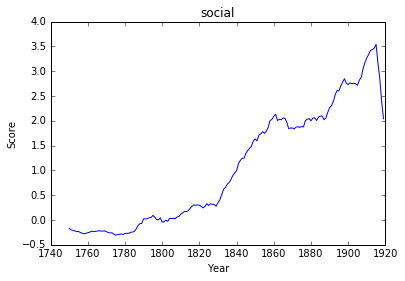

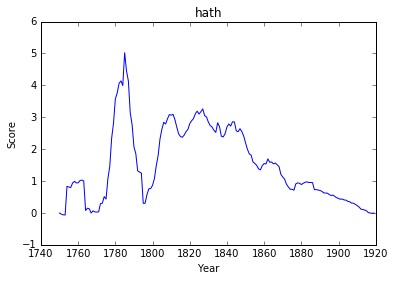

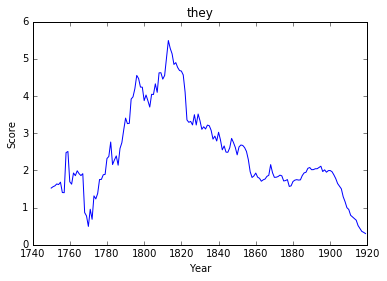

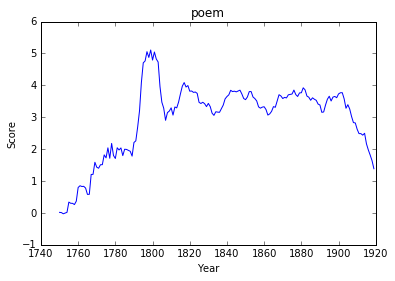

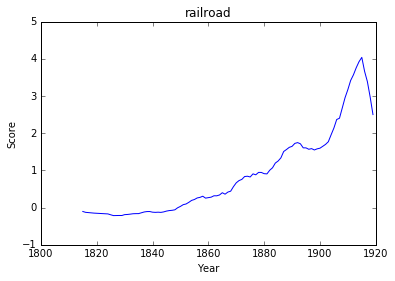

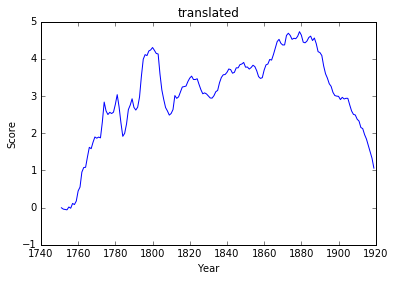

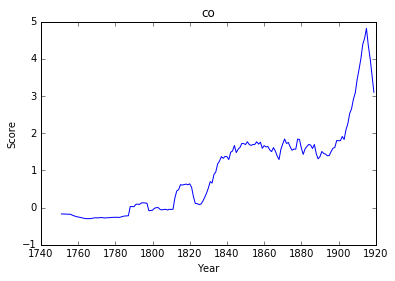

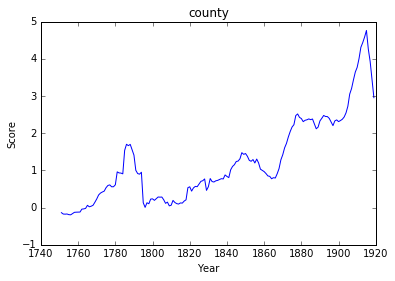

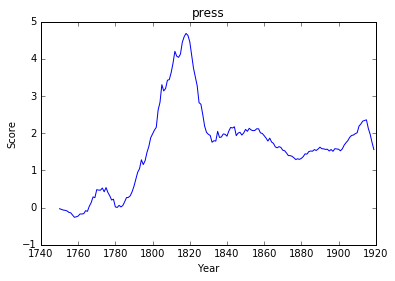

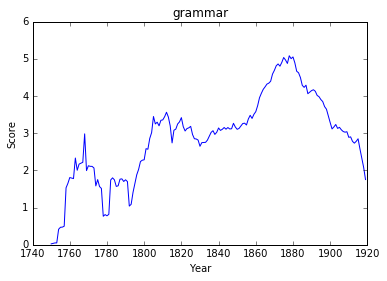

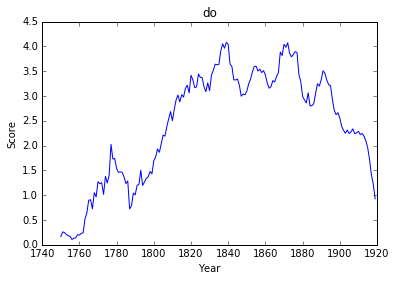

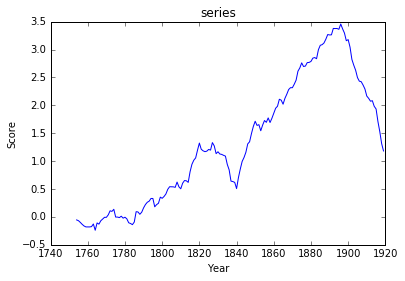

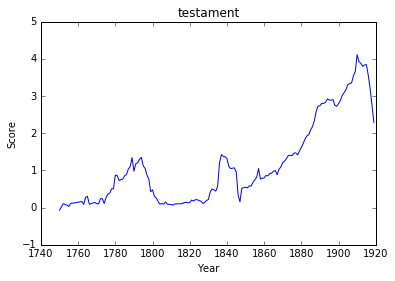

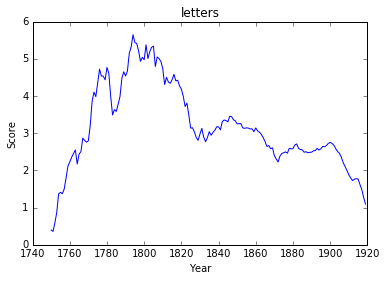

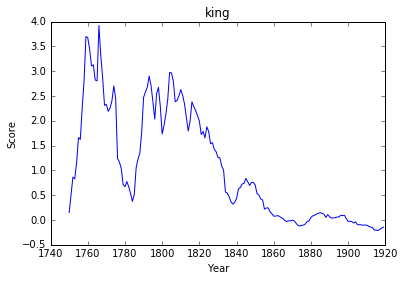

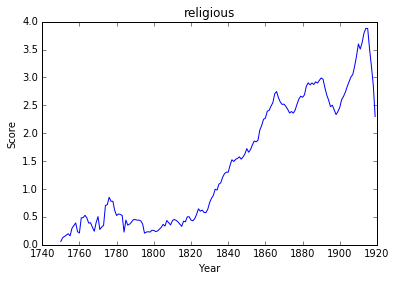

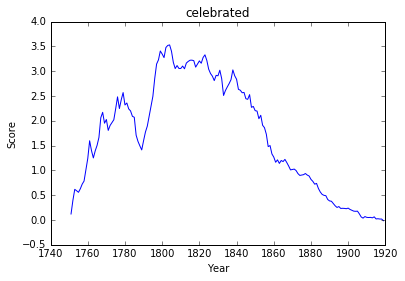

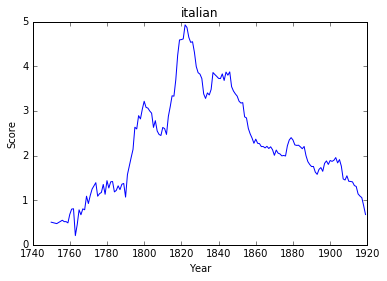

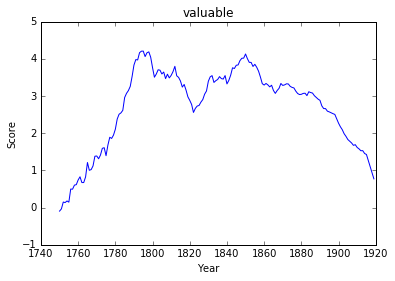

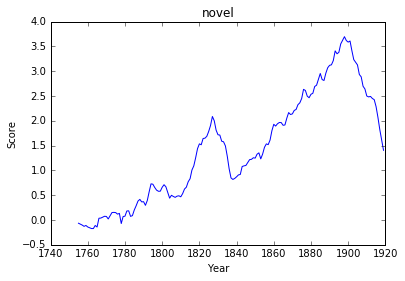

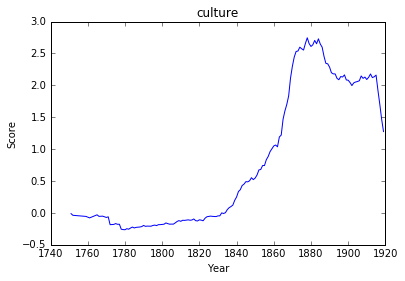

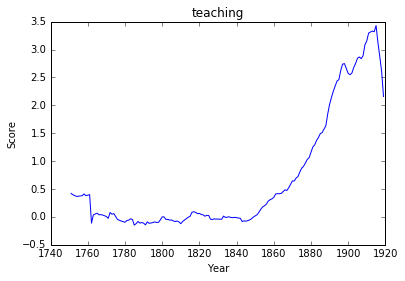

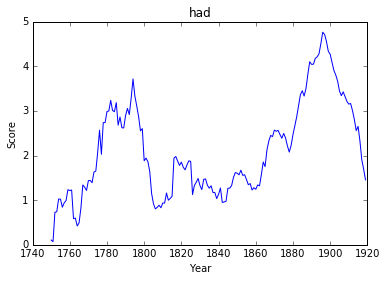

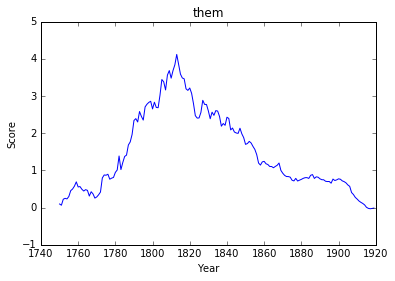

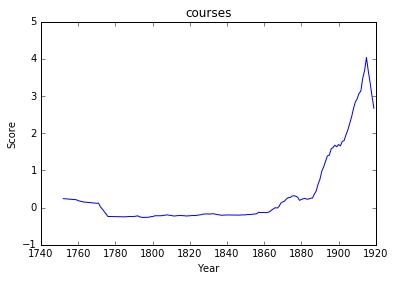

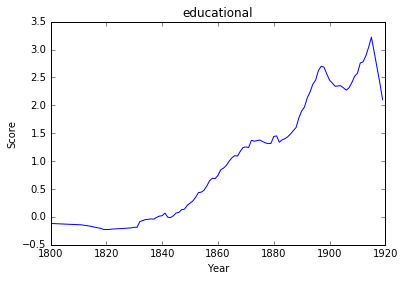

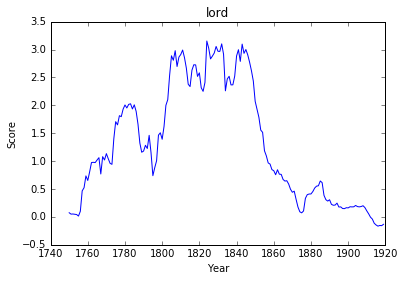

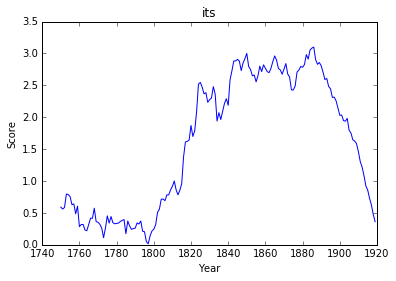

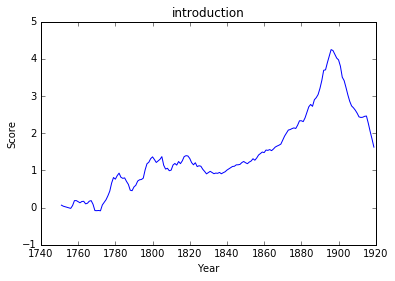

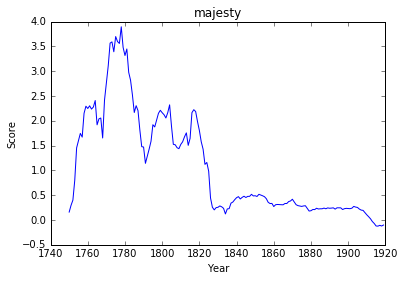

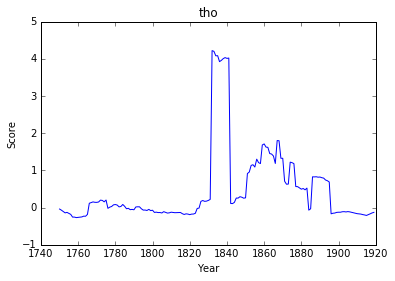

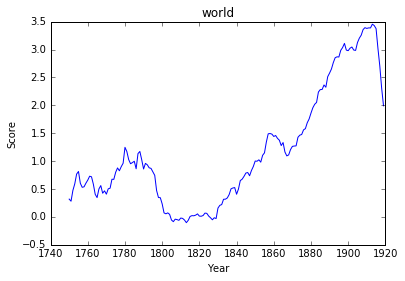

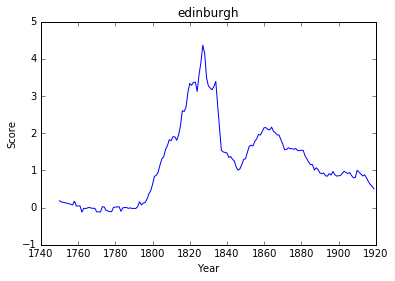

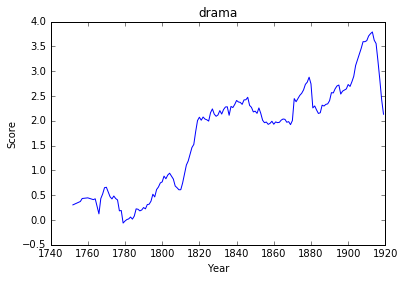

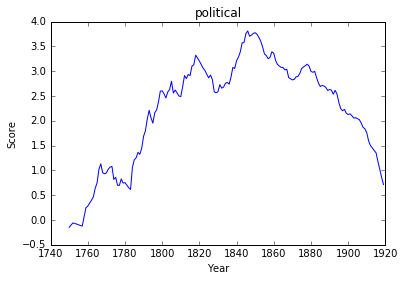

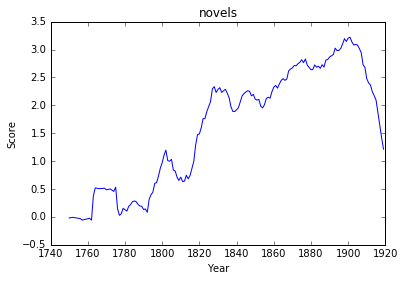

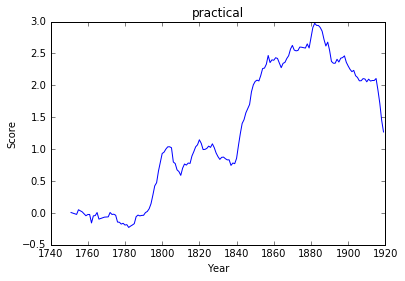

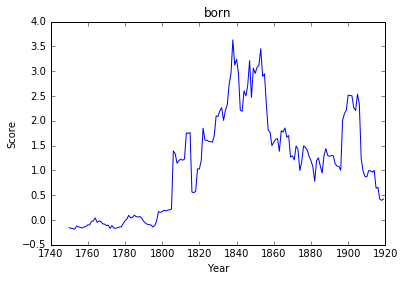

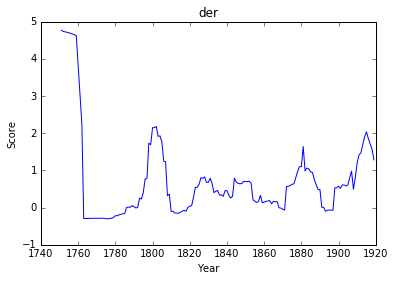

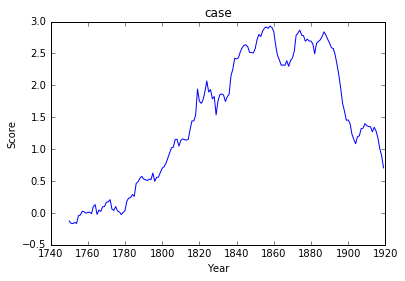

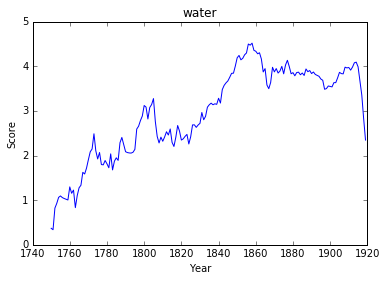

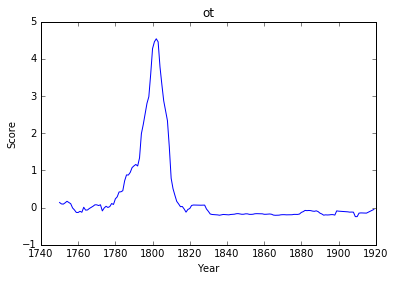

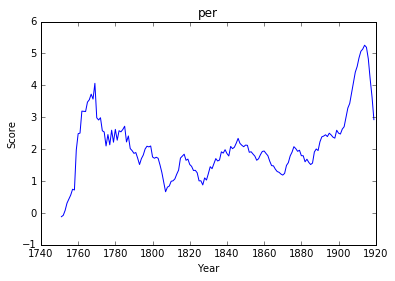

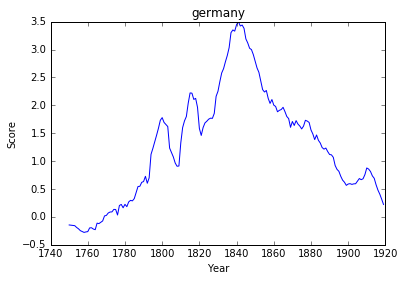

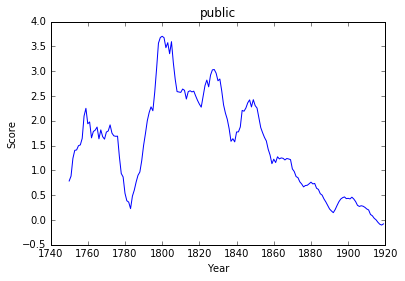

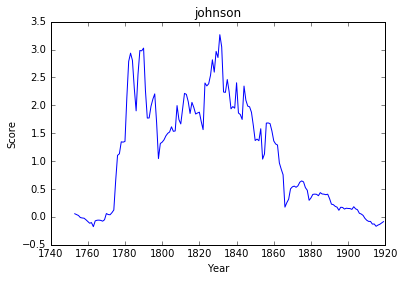

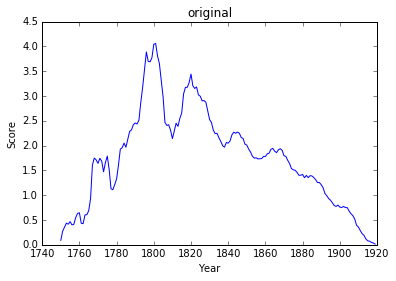

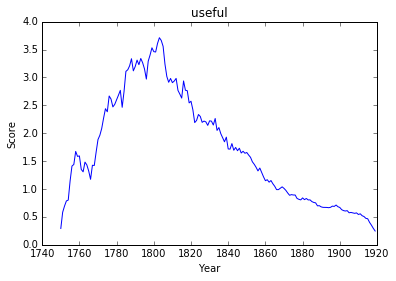

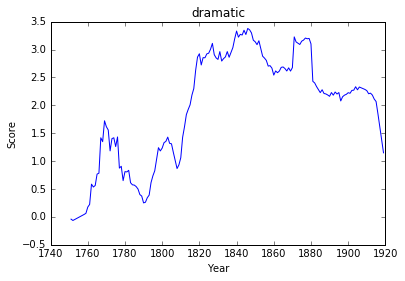

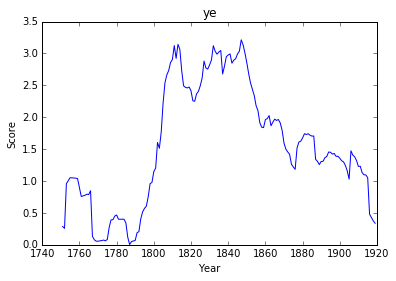

In [14]:
def plot_series(token, series):
    plt.title(token)
    plt.xlabel('Year')
    plt.ylabel('Score')
    plt.plot(*zip(*series.items()))
    plt.show()
    
for token, (series, variance) in list(tsv.items())[:200]:
    plot_series(token, series)